# Analysis of Crime rate in San Francisco 

### Content
+ Introduction: Crime rate in San Francisco
+ Data description and objectives
+ Data acquisiton and manipulation 
+ Data analysis and visualization 
+ Conclusion

## 1.Introduction: Crime Rate in San Francisco

San Francisco is a very large coastal city (i.e. on the ocean, a bay, or inlet) located in the state of California. With a population of 883,305 people and 198 constituent neighborhoods, San Francisco is the fourth largest community in California. 

With a crime rate of 64 per one thousand residents, San Francisco has one of the highest crime rates in America compared to all communities of all sizes - from the smallest towns to the very largest cities. One's chance of becoming a victim of either violent or property crime here is one in 16. Within California, more than 99% of the communities have a lower crime rate than San Francisco.

The overall crime rate in San Francisco is 151% higher than the national average.
For every 100,000 people, there are 18.86 daily crimes that occur in San Francisco.
San Francisco is safer than 5% of the cities in the United States.
The number of total year over year crimes in San Francisco has not changed.

Source(https://www.neighborhoodscout.com/ca/san-francisco/crime)

## 2.Data description and objectives

According to gleaned description San Francisco has by far the highest property crime rate in California, with more than twice the number of reported thefts per capita than Los Angeles or Santa Clara countries. It is quite interesting to recieve more information about San Francisco in terms of law-breaking for citizens as well as for city tourists.

The number of total year over year crimes in San Francisco has not changed. That is why Analysis of the data is based on the Police Department records of year 2016. Unfortunately there is information about crime only, nothing about criminal because of Privacy Policy.

The list below represents data,on which I will work, from the dataset:

+ Category- section of committed crime
+ Description - the way how law was breaked
+ Day of week - day of Week when the crime happened
+ Date - exact day when crime was comitted
+ Time - exact time when crime was committed
+ Disctrict - the neighborhood in San Francisco
+ Resolution - kind of Punishment given to the criminal to resolve the case
+ Address - address where the crime scene happened
+ X - latitude of the crime Location
+ Y - longitude of the Crime Location
+ Location - exact Location coordinates

The aim of the project is answer questions by building graphs and investigate them in visualization and analysis part.

Project questions:
+ Identify categories of breaked laws which are most common
+ Find District vs category of crime
+ Show Density of crime rate in map
+ Find Distribution of crime over the day
+ Weekday vs crime category
+ Identify crime rate in each month
+ Figure out resolution ratio for violent crime types


## 3. Data acquisiton and manipulation 

### 3.1. Data acquisiton: Dataset from Kaggle.com

This Problem Data set contains information about the law-breaking in San Francisco, which was came from the Crime Data Warehouse, a reliable data system maintained by the Police Department. So, in order to work with the data set, first we have to download file with comma separated values, then use appropriate pandas functions to read the data.

In [412]:
# for operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#for map
!pip install follium
import folium
import warnings
warnings.filterwarnings('ignore')


In [413]:
#reading the dataset
data = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [414]:
data.head(6)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
5,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134


### 3.2. Data manipulation: cleaning and shaping

In this step, we do following manipulations:
+ Inconsistent column names 
+ Dropping unnecessary columns
+ Missing data
+ Different data types
+ Duplicated rows
+ Data Shaping


#### Inconsistent column names

In [415]:
#check the column names and their data type
data.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

Most column names are understandable, excepting colmns containing data about District and Day of week. So, in order to avoid case-sensitive situations or unappropriate column name issues it is important to rename columns and change the case to upper.

In [416]:
#change the case to upper
data.columns=data.columns.str.upper()
data.columns

Index(['INCIDNTNUM', 'CATEGORY', 'DESCRIPT', 'DAYOFWEEK', 'DATE', 'TIME',
       'PDDISTRICT', 'RESOLUTION', 'ADDRESS', 'X', 'Y', 'LOCATION', 'PDID'],
      dtype='object')

In [417]:
#rename columns 
data.rename(columns={'PDDISTRICT':'DISTRICT','DAYOFWEEK':'DAY OF WEEK'},inplace = True);
data.head()

,INCIDNTNUM,CATEGORY,DESCRIPT,DAY OF WEEK,DATE,TIME,DISTRICT,RESOLUTION,ADDRESS,X,Y,LOCATION,PDID
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Now all column names are quite clear.

#### Dropping unnecessary columns

The last column, called police department id(PDID), will not be obliging and helpful in analysis. That is why we delete this column from the dataframe.

In [418]:
data.drop(columns=['PDID'],inplace = True);
data

,INCIDNTNUM,CATEGORY,DESCRIPT,DAY OF WEEK,DATE,TIME,DISTRICT,RESOLUTION,ADDRESS,X,Y,LOCATION
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)"
...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)"
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)"
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)"


#### Missing data

Rows having missing values can interfere in data visualization in future, that is why,first step is checking for missing values.

In [419]:
#checking for the missing data
#false means no missing data  
data.isnull().any()

INCIDNTNUM     False
CATEGORY       False
DESCRIPT       False
DAY OF WEEK    False
DATE           False
TIME           False
DISTRICT        True
RESOLUTION     False
ADDRESS        False
X              False
Y              False
LOCATION       False
dtype: bool

In [420]:
#columns with total row numbers, which are not empty 
data1 = pd.DataFrame()
data1["Columns"] = list(data.columns)
data1["Count"] = list(data.count())

data1

,Columns,Count
0,INCIDNTNUM,150500
1,CATEGORY,150500
2,DESCRIPT,150500
3,DAY OF WEEK,150500
4,DATE,150500
5,TIME,150500
6,DISTRICT,150499
7,RESOLUTION,150500
8,ADDRESS,150500
9,X,150500


As we can see, almost all columns have full data excepting District column.

In [421]:
#total number of missed values
data.isnull().sum().sum()

1

The amount of the missed data is only 1 value about Disctrict. It will not play a big role in the analysis.In this case just dropping row to which the missed value belongs is correct solution.

In [422]:
#deleting rows with NaN values
data = data.dropna()

In [423]:
#checking number of missed value after getting rid/replacing 
data.isnull().sum().sum()

0

After dropping missed value there are 150499 rows of info about crime incidents. There is no more missed value.

#### Duplicated data

Duplicated data ables to increase number of incidents in some questions, which leads not real picture of the situation.

In [424]:
#checking for duplicated data
#shows total number of duplicated data
data.duplicated().sum()

14

14 rows out of 150499 are duplicated. Below we can see dupliacted rows.

In [425]:
#retrieve all duplicated rows 
data.loc[data.duplicated(),:]

,INCIDNTNUM,CATEGORY,DESCRIPT,DAY OF WEEK,DATE,TIME,DISTRICT,RESOLUTION,ADDRESS,X,Y,LOCATION
6820,160251254,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,03/26/2016 12:00:00 AM,16:59,SOUTHERN,JUVENILE BOOKED,800 Block of MARKET ST,-122.407634,37.784189,"(37.7841893501425, -122.407633520742)"
25853,160112361,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,02/07/2016 12:00:00 AM,00:01,SOUTHERN,NONE,500 Block of HOWARD ST,-122.397032,37.787825,"(37.7878246694374, -122.397032436528)"
31759,160208584,LARCENY/THEFT,GRAND THEFT FROM PERSON,Friday,03/11/2016 12:00:00 AM,19:45,TARAVAL,"ARREST, BOOKED",0 Block of BRIGHTON AV,-122.455184,37.719153,"(37.7191534375561, -122.45518407114)"
46070,160441524,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,05/30/2016 12:00:00 AM,11:50,PARK,NONE,1000 Block of FULTON ST,-122.434046,37.777329,"(37.777329275022, -122.434046062672)"
51769,160536288,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,07/02/2016 12:00:00 AM,15:04,MISSION,"ARREST, BOOKED",1900 Block of MISSION ST,-122.419677,37.765851,"(37.7658510977435, -122.41967661615)"
55101,160567380,ROBBERY,"ROBBERY, ATM, FORCE, ATT.",Wednesday,07/13/2016 12:00:00 AM,23:25,NORTHERN,"ARREST, BOOKED",VANNESS AV / ELLIS ST,-122.421012,37.783823,"(37.7838226942199, -122.421011927709)"
65778,160664077,LARCENY/THEFT,GRAND THEFT FROM PERSON,Wednesday,08/17/2016 12:00:00 AM,10:57,SOUTHERN,NONE,MARKET ST / TAYLOR ST,-122.410294,37.782231,"(37.7822305870036, -122.41029351969)"
87499,160854773,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,10/20/2016 12:00:00 AM,09:00,CENTRAL,NONE,200 Block of COLUMBUS AV,-122.406410,37.797759,"(37.7977588402975, -122.406409965318)"
91394,160888493,LARCENY/THEFT,GRAND THEFT FROM PERSON,Monday,10/31/2016 12:00:00 AM,20:25,SOUTHERN,NONE,1500 Block of MARKET ST,-122.419842,37.774823,"(37.7748226184309, -122.419842305148)"
106727,161020965,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/15/2016 12:00:00 AM,09:48,TARAVAL,NONE,700 Block of IRVING ST,-122.465784,37.764005,"(37.764005093998, -122.465784159577)"


On this stage, the following code realizes keeping one of duplicated row and drop others.

In [426]:
#drop duplicates except the very first row 
data=data.drop_duplicates(keep='first')

In [427]:
# the number of rows left after dropping duplicates
data.shape

(150485, 12)

Since there are 150485 rows, consequently there is no more duplicated data.

#### Data types

In [428]:
#checking the data types 
data.columns

Index(['INCIDNTNUM', 'CATEGORY', 'DESCRIPT', 'DAY OF WEEK', 'DATE', 'TIME',
       'DISTRICT', 'RESOLUTION', 'ADDRESS', 'X', 'Y', 'LOCATION'],
      dtype='object')

All the attrubutes of the table are object typed. It can be barrier while visualizing part. Changing data types of columns related to time and string .

In [429]:
#assigning the appropriate data type
data["DATE"] = data["DATE"].apply(pd.to_datetime)

In [430]:
data.astype({'CATEGORY': 'string','DESCRIPT':'string' ,'DAY OF WEEK':'string','RESOLUTION':'string'}).dtypes

INCIDNTNUM              int64
CATEGORY               string
DESCRIPT               string
DAY OF WEEK            string
DATE           datetime64[ns]
TIME                   object
DISTRICT               object
RESOLUTION             string
ADDRESS                object
X                     float64
Y                     float64
LOCATION               object
dtype: object

Now all the appropriate data types are assigned to the columns.

#### Data shaping

In [431]:
# shaping data
# use shape function to retrieve number of observations and columns in the dataset
data.shape

(150485, 12)

We have done all the manipulations on the dataframe.The data is well organized and clean. The further steps can require grouping, or other additional preparations.

## 4.Data analysis and visualization

In this section, Project questions will be visualized as graphs and analyzed recived figures using libraries such as Seaborn, Folium and Matplotlib.

For each respond requred steps are provided under questions.



#### Q1: Identify categories of breaked laws which are most common

1. Using Matplotlib module to assign to the plot appropriate parameters.
2. Visualizing the counts of observations in each categorical bin using horizontal bars.

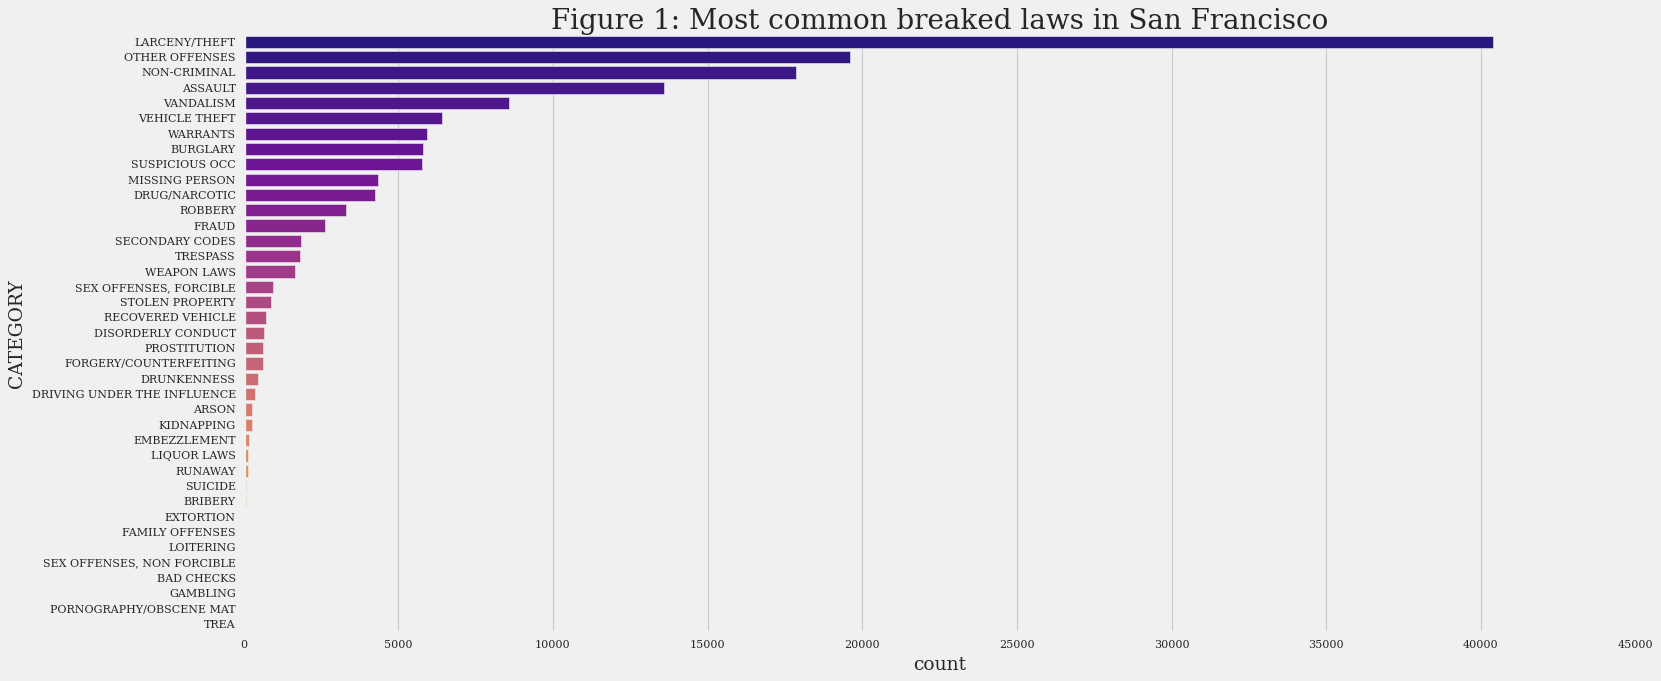

In [432]:
#some designing code to receiving understandable figure 
plt.rcParams['figure.figsize'] = (20,9)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 15
plt.style.use('fivethirtyeight')
#counting number of crimes grouped by category of crime 
sns.countplot(y=data['CATEGORY'], palette = 'plasma',order=data['CATEGORY'].value_counts().index)
#title for figure
plt.title('Figure 1: Most common breaked laws in San Francisco', fontweight = 40, fontsize =25)

plt.show()



As shown in Figure 1, the major crime categories are Larceny/Theft,Vandalism,Assault, while the minors are Gambling, Pornography/Obsence mat and Trea. According the graph the amount of incidents by Larceny is over 40000. It is comforting to know that non violent crime types are on the top of the rating.

#### Q2: Find District vs category of crime

Distribution of districts over each crime category 
1. Data preparation by building a crosstable to get the crime counts per one neighborhood of the city.
2. Normalizing the counts and visualizing them using a stacked bar chart from the matplotlib library.


In [433]:
#crosstab to find amount of crimes groupped by set of districts and category
plot_cd=pd.crosstab(data['CATEGORY'], data['DISTRICT'])
plot_cd.head()

DISTRICT,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
CATEGORY,,,,,,,,,,
ARSON,71,29,22,46,27,13,14,33,18,13
ASSAULT,1775,1187,1506,2110,1536,524,473,2352,918,1196
BAD CHECKS,4,3,2,2,4,2,5,6,6,0
BRIBERY,20,3,8,10,4,1,2,8,4,6
BURGLARY,521,645,534,793,803,413,395,842,695,161


In [434]:
#divide  the result of crosstab to find kind of frequency percent
plot_cd1=plot_cd.div(plot_cd.sum(axis=1),axis=0)*100
plot_cd1.head()

DISTRICT,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
CATEGORY,,,,,,,,,,
ARSON,24.825175,10.139860,7.692308,16.083916,9.440559,4.545455,4.895105,11.538462,6.293706,4.545455
ASSAULT,13.073580,8.742727,11.092288,15.540988,11.313250,3.859468,3.483833,17.323415,6.761435,8.809015
BAD CHECKS,11.764706,8.823529,5.882353,5.882353,11.764706,5.882353,14.705882,17.647059,17.647059,0.000000
BRIBERY,30.303030,4.545455,12.121212,15.151515,6.060606,1.515152,3.030303,12.121212,6.060606,9.090909
BURGLARY,8.979662,11.116856,9.203723,13.667701,13.840055,7.118235,6.807997,14.512237,11.978628,2.774905


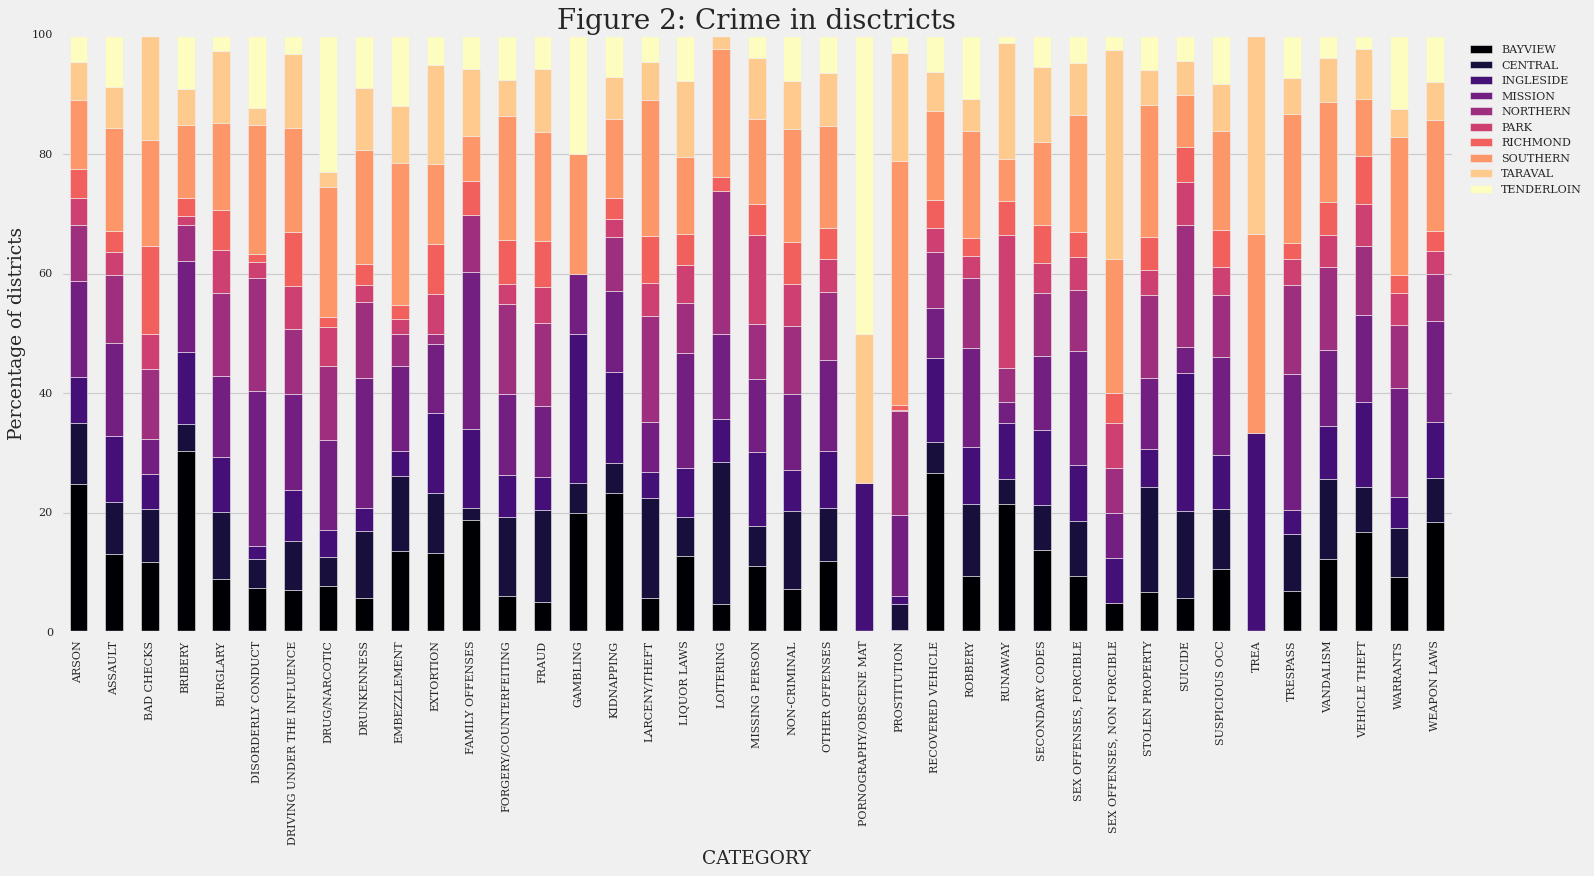

In [435]:
#plotting the graph with designed parameters
plot_cd1.plot(kind='bar',stacked=True, color = plt.cm.magma(np.linspace(0, 1, 10)))
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 15
plt.style.use('ggplot')
plt.title('Figure 2: Crime in disctricts', fontweight = 40, fontsize =25)
plt.ylabel('Percentage of districts')
#legend is the box on the right side showing the district identification 
plt.legend(bbox_to_anchor=(1.1,1.0))
plt.show()

From Figure 2 the following data have been obtained:

In Tenderloin district crime categories,such Drug/Narcotic,Gambling and Pornography/Obsence mat,

In Taraval district crime categories, such non forcible Sex offences and Trea,

In Southern district crime categories, such Prostitution, Trea, Embezzlement, Warrants and so on,

In Northern district crime categories, such Disorderly conduct,Family offences and Lottering,

In Bayview district crime categories, such Arson,Bribery,Kidnapping, Recovered vehicle, 

are wide-spreaded groups of crime in city of Sanfrancisco.

So Southern district is clearly most dangerous when it comes to violent crimes.
    

#### Q3: Show Density of crime rate in map

Map of Sanfrancisco to show the each region with proportion of registered crime incidents. 
1. Creating table for neighborhoods and count number of crimes in each of them. Dividing number of incidents by total amount of incidents to identify proportion and saving it in new column.
2. Using json to load interactive map. 
3. Generating empty map of city using folium library. While generating map, it is important to mention the coordinates of city we need. 
4. Visualizing choropleth map splitted by districts.

In [436]:
#creating table for districts and number of incidents which are belong to this districts
#resetting index for columns
district_count = data.DISTRICT.value_counts().reset_index()
#indicate proportion of crime rate for each district
district_count['Weight']=district_count['DISTRICT']/150485
#rename columns 
district_count.rename({'index': 'Neighborhood','DISTRICT':'Number'}, axis='columns', inplace=True)
district_count

,Neighborhood,Number,Weight
0,SOUTHERN,28440,0.188989
1,NORTHERN,20099,0.133561
2,MISSION,19501,0.129588
3,CENTRAL,17663,0.117374
4,BAYVIEW,14303,0.095046
5,INGLESIDE,11594,0.077044
6,TARAVAL,11323,0.075243
7,TENDERLOIN,9942,0.066066
8,RICHMOND,8922,0.059288
9,PARK,8698,0.057800


In [437]:
#loading JSON file with the interactive map 
json_map = r'https://cocl.us/sanfran_geojson'

In [438]:

#coordinates for city we needed
city_coordinates = (37.76, -122.45)
# create map of city 
map = folium.Map(location=city_coordinates, zoom_start=12)
map

In [439]:
#dividing the city into regions using table we have created before 
map.choropleth(
    geo_data=json_map,# using json interactive map 
    data=district_count,
    columns=['Neighborhood', 'Weight'],
    key_on='feature.properties.DISTRICT',
    fill_color='Set1_r', 
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='San Fransisco Crime by Neighborhood'

)

map

From the map, the following data has obtained:

In Southern and Northern districts the crime rate shows high significance comparing with other regions. Richmond and Park districts have relatively lowest crime rate. 18.8% of crime incidents happens in Southern neighborhood. While 5.8% of crimes take place in Park neighborhood. The yellow part shows regions with crime ratio under 8%.

####  Q4: Find Distribution of crime over the day

1. Data preparation by counting all incidents happened in particular time
2. Visualizing the results through vertical bar chart

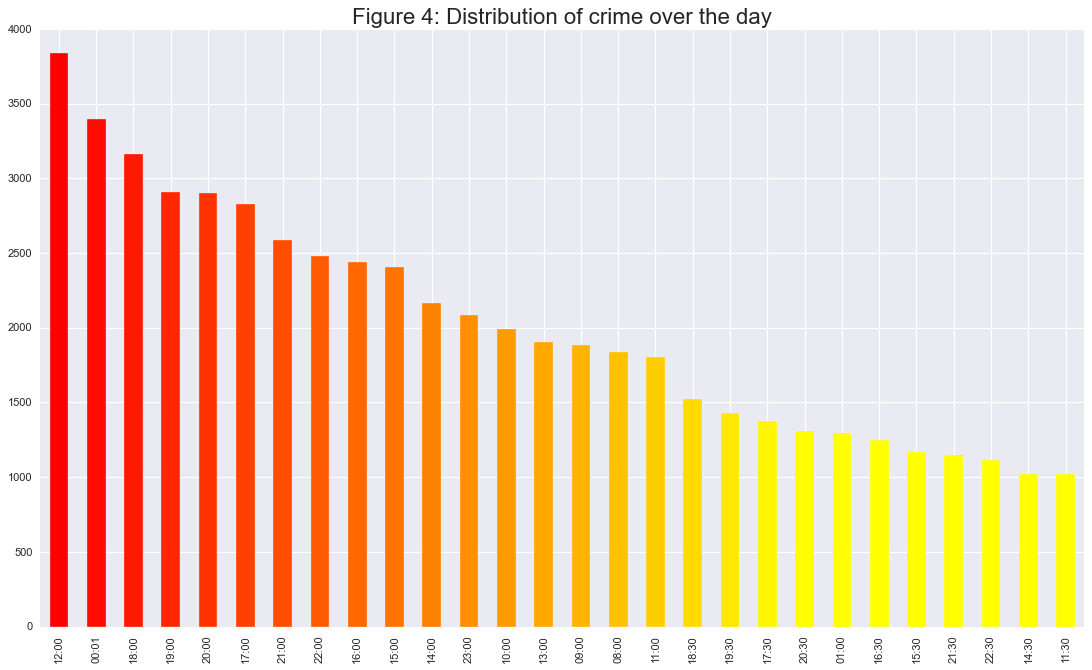

In [440]:
#count number of crime in one day separated as hours
plot_dd=data['TIME'].value_counts().head(28)
plt.style.use('seaborn')
color = plt.cm.autumn(np.linspace(0, 5, 100))
#ploting the graph for distibution over the day
plot_dd.plot.bar(color = color, figsize = (15, 9))
plt.title('Figure 4: Distribution of crime over the day', fontsize = 20)
plt.show()




As Figure 3.1 represents,the time when most of law-breakings are commited is night time. Especially, the midnight is most dangerous part of the day. The number of crimes occurring during the day/morning is much less. However, the it does not mean that daytime crime rate is satisfactory little.

#### Q5: Weekday vs Crime category

Crime rate over week considering crime category.
1. Identifying Top 10 crime categories by number of incidents.
2. Using crosstab which is conducive to distribute crime categories percentage by the week day. It is worth to mention that week days should be arranged in fit order. 
3. Visualizing results by plotting heatmap from Seaborn library.

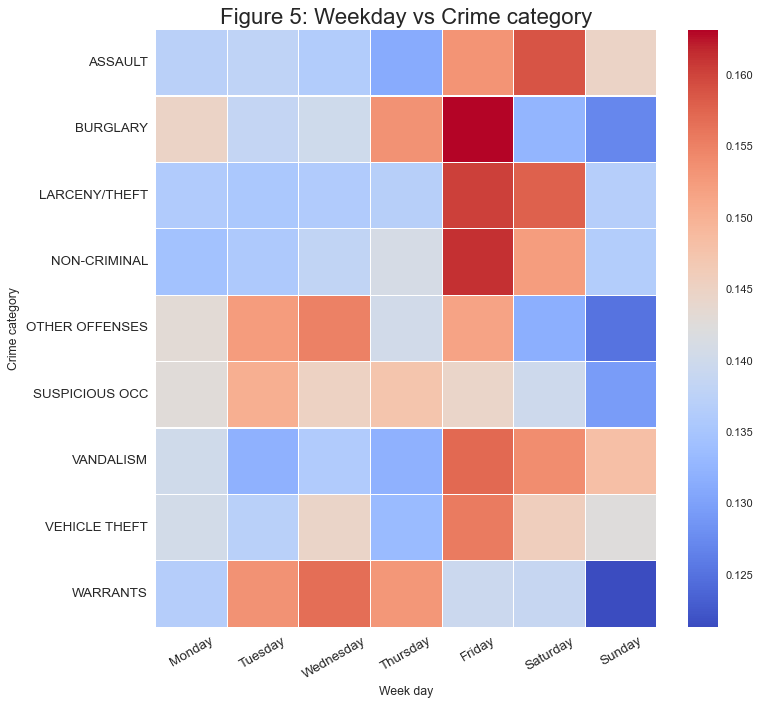

In [447]:
#data preparation
# Get top 10 most common crimes
top10 = data['CATEGORY'].value_counts()[0:9].sort_values()
plt.style.use('seaborn')
categories = top10.index
#choose from dataframe categories which are in top 10
category = data[data['CATEGORY'].apply(lambda x: x in categories)]


#cross table to count the number of crime types in each day of week
ctgry_week = pd.crosstab(category['CATEGORY'], category['DAY OF WEEK']) 

# percentage of crime
ctgry_week = ctgry_week.div(ctgry_week.sum(axis=1), axis=0)

# week days in correct order
ctgry_week = ctgry_week[['Monday','Tuesday', 'Wednesday','Thursday', 'Friday','Saturday','Sunday']]

# visualization using heatmap
fig = plt.figure(figsize=(9,9))
ax = sns.heatmap(ctgry_week,
                 cmap="coolwarm", linewidths=.1)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12)
plt.xlabel("Week day")
plt.ylabel("Crime category")
plt.title('Figure 5: Weekday vs Crime category', fontsize = 20)
plt.show()

As the graph above illustrates, most crimes happen during the weekend when people go out. Some other crimes are more often registered during weekdays which might be associated with the routine of police works. The day when crime types such as burglary, robbery and  vandalism are occuring frequently is obviously friday. Adequately, the first workday after weeekends is indicated as safest day of week.

#### Q6: Identify crime rate in each month

Next step is visualize crime rate in terms of months as pie chart.
1. Counting crime number in each month ordered by amount of crime descendingly.
2. Assigning month names.
3. Plotting a pie chart with percentage.

In [442]:
#select each month from date typed date column and count number of crimes committed in particular month
data['DATE'].dt.month.value_counts()

10    13329
1     12944
12    12925
5     12712
11    12670
9     12473
8     12427
3     12359
4     12316
7     12164
2     12090
6     12076
Name: DATE, dtype: int64

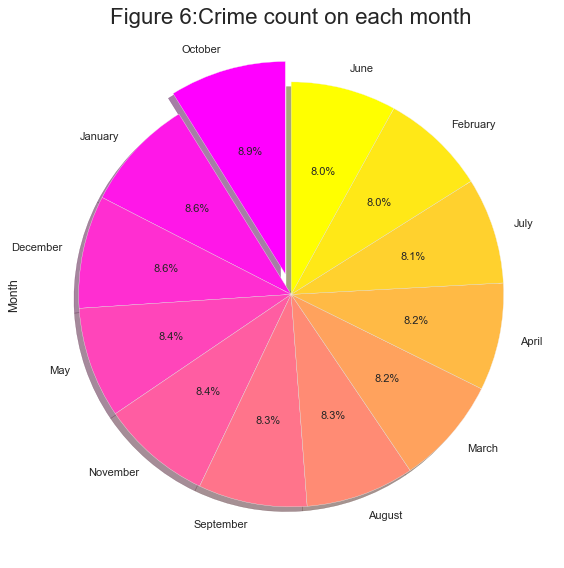

In [443]:
#visualization
plt.style.use('seaborn-darkgrid')
color = plt.cm.spring(np.linspace(0, 1, 12))
#assining names to the month and arranging them in sorted order 
labels = 'October', 'January', 'December', 'May','November','September','August','March','April','July','February','June'
data['Month'] = data['DATE'].dt.month
#plotting the pie chart with appropriate params
data['Month'].value_counts().plot.pie(
figsize = (15, 8), explode = (0.1, 0,0,0,0,0,0,0,0,0,0,0),
    labels=labels, colors=color,autopct='%1.1f%%',
        shadow=True, startangle=90
)

plt.title('Figure 6:Crime count on each month',fontsize = 20)

plt.xticks(rotation = 90)

plt.show()







As the figure 6 presents, there is no significant difference between crime rates distributed over month.Month with most and least crime percentage is October and June,respectievly.The extension of percentage is 0.9%. So we can say that crime rate is not so much depend on the months.

#### Q7: Figure out resolution ratio for violent crime types

1. Picking some violent crime categories. 
2. Defining incident resolution, it means punished crime will be indicated as 1, while resolution status like 'NONE' or 'NOT PROSECUTED' will be 0. The data about crime resolution will be stored in Arrest variable.
3. Keeping crime categories,number of punished crimes and total number of incidents in each category in x,y1,y2 variables respectively.
4. Visualizing stacked area plot provided by Matplotlib module.

In [444]:
# Pick crime types 
violent = data[data.CATEGORY.isin(['ASSAULT','BURGLARY', 'KIDNAPPING', 'ROBBERY','SEX OFFENSES, FORCIBLE'])].copy()
# Create Arrest variable to define resolution of crime
#if violent crime was punished the number 1 assigns to this incident,else 0
violent['Arrest'] = np.where(violent['RESOLUTION'].isin(['NONE', 'NOT PROSECUTED']), 0,1)
# Calculate counts
x= ['ASSAULT','BURGLARY', 'KIDNAPPING', 'ROBBERY','SEX OFFENSES, FORCIBLE']
y1 = violent['CATEGORY'][violent.Arrest==1].value_counts().sort_index()
y2 = violent['CATEGORY'].value_counts().sort_index()
y1

ASSAULT                   5641
BURGLARY                  1048
KIDNAPPING                  99
ROBBERY                    717
SEX OFFENSES, FORCIBLE     266
Name: CATEGORY, dtype: int64

In [445]:
y2

ASSAULT                   13577
BURGLARY                   5802
KIDNAPPING                  257
ROBBERY                    3298
SEX OFFENSES, FORCIBLE      940
Name: CATEGORY, dtype: int64

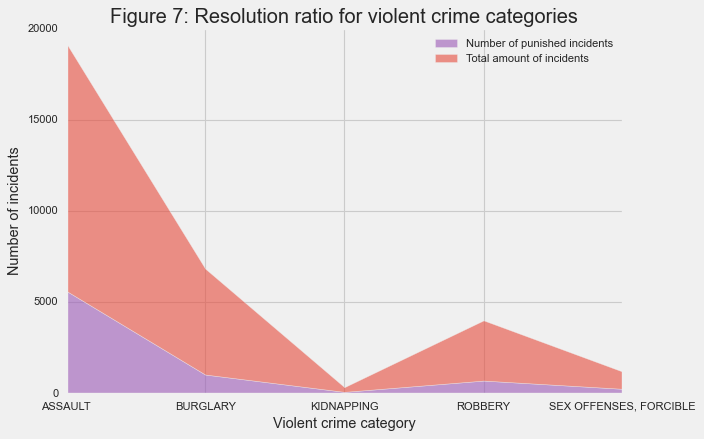

In [446]:
#visualization
#style
plt.style.use('fivethirtyeight')
#choosing color 
color= ["#9b59b6", "#e74c3c"]
#stacked area graph with params
plt.stackplot(x,y1,y2,labels=['Number of punished incidents','Total amount of incidents'],baseline='zero',colors=color,alpha=0.6)
#location of legend
plt.legend(loc='upper right')
#title and identifying x and y axis namings
plt.title('Figure 7: Resolution ratio for violent crime categories', fontsize=18)
plt.xlabel('Violent crime category', fontsize = 13)
plt.ylabel('Number of incidents',fontsize = 13)
plt.show()

Based on Figure 7, it is clear that punished crimes rate is below 50% for all the violent crime types we choosed. In the case of burglary, the number of punished crimes is only 1078, while unsolved crime number is 5802. Here, police success rate is 18%.

## 5.Conclusion

Overall, from section visualization and analysis some conclusions about crime in San Francisco can be drawn. Making use of different plot types, such as bar chart, pie chart, geographical map, area stacked graph and so on, was efficient in favor of analysis. 

The conclusions, which will be made below, have to be considered by citizens and tourists of the city for their personal safety. In addition, police department ables to strengthen protection of the urban environment and at the same time reduce crime rate.

+ Crimers of city are practicing stealing, assaulting in most of time. The most popular crime category by number of registered incidents is larceny, and the least one is category of trea, which means trespassing or loitering near posted industrial property.
+ There was not tendency in special crime categories in particular districts, excepting several crime categories such as pornography/obscene mat which differentiates in Tenderloin district. It means that person can meet law-breaking of any type in any part of the city.
+ However, each district shows different proportion of crime. So, according to map, as much as 19 percent of commited law-breakings is occupied by the southern region. But the crime rate does not exceed 8 percent in a greatly large part of the city.
+ Majority crimes seem to peak at the following hours during the day: noon, from 5-6 PM in the evening till midnight. It might thus be advisable for the police to intensify patrolling in the districts during these hours.
+ Most vandals and robbers show themselves after the end of the work week, when many go out to rest and have fun.
+ The trend in terms of crime rate in months has not been noticed. The crime distribution in each month is not differ so much.
+ Most of violent crimes have not solved, the resulution for them is usually nothing or just remark. Most of time incidents are not considering in court as matter.
